# COVID-19 Data Explorer Dashboard

#### The COVID-19 pandemic has significantly impacted our world, leading to immense challenges both in terms of public health and societal well-being. In the face of this global crisis, data-driven insights have become crucial to understanding the spread and impact of the virus. To facilitate easy access to key information, I have developed a comprehensive COVID-19 Dashboard.

#### The purpose of this dynamic dashboard is to provide users with real-time access to vital statistics and trends related to COVID-19. By leveraging a variety of visualisations and interactive features, the dashboard aims to empower individuals, researchers, and policymakers with the necessary tools to comprehensively analyse the progression of the pandemic.

#### In this dashboard, I primarily focus on two critical aspects: daily and cumulative deaths over time, as well as the age distribution in terms of sex and age bands of those affected. By highlighting these specific elements, I aim to shed light on the severity of the virus and its impact on different demographics.

#### With the COVID-19 Dashboard, we hope to contribute to a better understanding of the pandemic's dynamics and aid in informed decision-making. By presenting essential data in an intuitive and visually appealing manner, we aim to empower users to recognise patterns, identify trends, and gain insights into the devastating impact of COVID-19.

#### Data Source:
#### The dashboard relies on data sourced from Public Health England (PHE), a reliable and authoritative health organization. By leveraging PHE's data, the dashboard aims to present accurate and timely information, ensuring users have a trustworthy resource for monitoring the impact of COVID-19.

# Key Features

1. ##### The dashboard displays the latest COVID-19 data from the UK government's Public Health England (PHE) API.
   
2. ##### Users can interact with charts and graphs to explore the data in more detail.

3. ##### The dashboard provides daily death summary and age-specific breakdowns of the data.

4. ##### Users can filter the data by date, region, and age group.

5. ##### Users can download the raw data in JSON and pickle formats.

In [1]:
#pip install uk-covid19

  Using cached uk_covid19-1.2.2-py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100
plt.style.use('fivethirtyeight')

filters = [
    'areaType=nation', # note each metric-value pair is inside one string
    'areaName=England'
]

# values here are the names of the PHE metrics
structure = {
    "date": "date",
    "areaName":"areaName",
    "dailyDeaths": "newDeaths28DaysByPublishDate",
    "cumulativeDeaths": "cumDeaths28DaysByPublishDate"
}

api = Cov19API(filters=filters, structure=structure)

covid19deathsummary = api.get_json()

#print(covid19deathsummary)

with open("covid19deathsummary.json", "wt") as OUTF:
    json.dump(covid19deathsummary, OUTF)


# Death Summary metrics

##### Below is the metrics used for querying the daily and cumulative COVID-19 deaths 

In [3]:
#pip install prettytable

  Using cached prettytable-3.9.0-py3-none-any.whl.metadata (26 kB)
Using cached prettytable-3.9.0-py3-none-any.whl (27 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
from prettytable import PrettyTable

# Define the structure
structure = {
    "date": "date",
    "areaName": "Area Name",
    "dailyDeaths": "New Deaths 28Days By Publish Date",
    "cumulativeDeaths": "Cumulative Deaths 28Days By Publish Date"
}

# Create a PrettyTable instance
table = PrettyTable()

# Define table headers
table.field_names = ["Field", "API Metric"]

# Add rows to the table
for field, api_metric in structure.items():
    table.add_row([field, api_metric])

# Print the table
print(table)


+------------------+------------------------------------------+
|      Field       |                API Metric                |
+------------------+------------------------------------------+
|       date       |                   date                   |
|     areaName     |                Area Name                 |
|   dailyDeaths    |    New Deaths 28Days By Publish Date     |
| cumulativeDeaths | Cumulative Deaths 28Days By Publish Date |
+------------------+------------------------------------------+


In [5]:

with open("covid19deathsummary.json", "rt") as INFILE:
    data = json.load(INFILE)
#data

datalist=data['data']
#datalist

In [6]:
dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()
#dates

In [7]:
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

# Start to End date

In [8]:
startdate = parse_date(min(dates))
enddate = parse_date(max(dates))
print(startdate, ' to ', enddate)

2020-03-06 00:00:00  to  2023-07-12 00:00:00


In [9]:
index=pd.date_range(startdate, enddate, freq='D')
covid19deathsummarydf=pd.DataFrame(index=index, columns=['areaName', 'dailyDeaths', 'cumulativeDeaths'])
#covid19deathsummarydf

In [10]:

for entry in datalist:
    date = parse_date(entry['date'])
    for column in ['areaName', 'dailyDeaths', 'cumulativeDeaths']:
        if pd.isna(covid19deathsummarydf.loc[date, column]):
            # handle non-numeric values for 'name'
            value = entry[column] if entry[column] is not None else 0.0
            covid19deathsummarydf.loc[date, column] = value

# fill in any remaining "holes" due to missing dates
covid19deathsummarydf.fillna(0.0, inplace=True)

#covid19deathsummarydf


# Data Exploration

##### Through a combination of line graphs, bar charts, and pie charts, I will visually represent pertinent information such as the daily number of deaths, the cumulative count of deaths, the distribution of deaths across age groups, and the proportion of deaths based on gender. The dashboard additionally allows users to filter the data based on specific time ranges, age groups, and genders, enabling more targeted analysis.

# Daily Deaths and Cumulative Deaths Over Time

1. ##### The number of reported deaths due to COVID-19 on a specific day.

2. ##### The total number of reported deaths due to COVID-19 from the beginning until the present date.

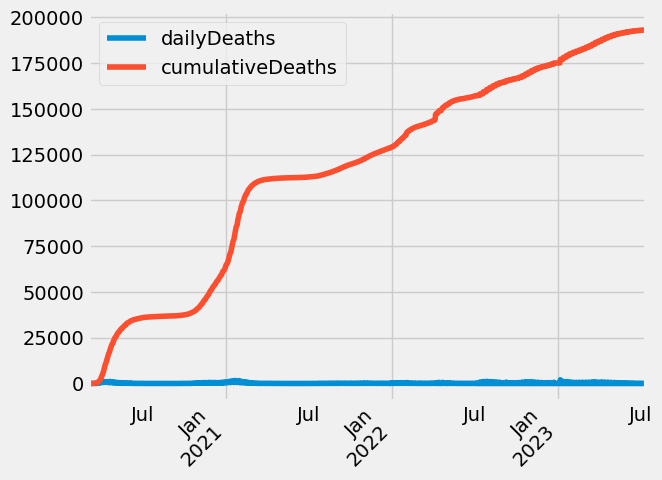

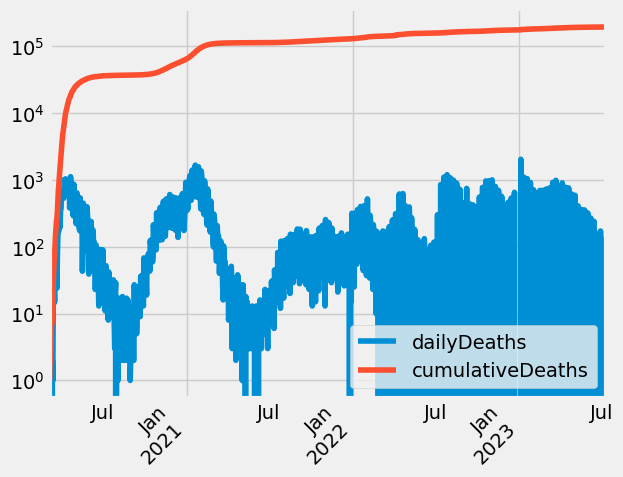

In [13]:
covid19deathsummarydf.plot()
plt.xticks(rotation=45, ha='right')
covid19deathsummarydf.plot(logy=True)
plt.xticks(rotation=45, ha='right')
disable=True


# Interactive graph for Daily and Cumulative Deaths Over Time
##### An interactive graph for the number of daily and cumulative reported deaths due to COVID-19

In [14]:
covid19deathsummarydf.to_pickle("covid19deathsummarydf.pkl")

In [15]:
covid19deathsummarydf=pd.read_pickle("covid19deathsummarydf.pkl")

covid19deathsummarydf['date'] = covid19deathsummarydf.index

plt.style.use('fivethirtyeight')

#def covid19deathsummary_graph(gcols, gscale):
    #if gscale == 'linear':
        #logscale = False
    #else:
        #logscale = True

    #numeric_cols = [col for col in gcols if col != 'areaName']
    
    
        #plt.figure(figsize=(10, 6))

    
    #if numeric_cols:
        #covid19deathsummarydf[numeric_cols].plot(logy=logscale)
       
        
def covid19deathsummary_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        covid19deathsummarydf[list(gcols)].plot(logy=logscale)
        #plt.show() # important - graphs won't update if this is missing 

       

        # Customize the plot
        plt.xlabel('Date')
        plt.ylabel('Number of Deaths')
        plt.title('Daily and Cumulative Deaths Over Time')
        plt.xticks(rotation=45, ha='right')
        plt.legend(gcols, loc='upper left')
        plt.show()
    else:
        print("Click to select numeric data for graph")
        print("(CTRL-Click to select more than one category)")


series = wdg.SelectMultiple(
    options=['dailyDeaths', 'cumulativeDeaths'],
    value=['dailyDeaths', 'cumulativeDeaths'],
    rows=2,
    description='Stats:',
    disabled=False
)

scale = wdg.RadioButtons(
    options=['linear', 'log'],
    description='Scale:',
    disabled=False
)

# try replacing HBox with a VBox
controls = wdg.HBox([series, scale])

# keep calling covid19deathsummary_graph(gcols=value_of_series, gscale=value_of_scale); 
# capture output in widget graph   
graph = wdg.interactive_output(covid19deathsummary_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)


Output()

# Gender and Age Bands

##### The distribution of COVID-19 cases across different age groups, providing insights into the vulnerability of various demographic segments. Understanding how the virus affects different gender age groups is crucial for targeted public health measures and resource allocation.

In [16]:
# Query 2: Investigation of the distribution of cases by sex and age bands


filters = [
    'areaType=nation',
    'areaName=England'
]


structure = {
    "males": "maleCases",
    "females": "femaleCases"
}

api = Cov19API(filters=filters, structure=structure)

agedistribution=api.get_json()
#print(agedistribution)

import json
with open("agedistribution.json", "wt") as OUTF:
    json.dump(agedistribution, OUTF)


# Gender and Age Band Metric

In [17]:
from prettytable import PrettyTable

# Define the structure
structure = {
    "males": "maleCases",
    "females": "femaleCases"
}

# Create a PrettyTable instance
table = PrettyTable()

# Define table headers
table.field_names = ["Field", "API Metric"]

# Add rows to the table
for field, api_metric in structure.items():
    table.add_row([field, api_metric])

# Print the table
print(table)

+---------+-------------+
|  Field  |  API Metric |
+---------+-------------+
|  males  |  maleCases  |
| females | femaleCases |
+---------+-------------+


# Gender And Age Band Visual Graph

##### A visualised bar graph of gender & age Band. Each bar represents a specific age band, and the distribution of cases within each band is differentiated by sex (male, female).

In [18]:
with open("agedistribution.json", "rt") as INFILE:
    data = json.load(INFILE)
#data

datadic=data['data'][0] # data['data'] is a list
#datadic

males=datadic['males']
females=datadic['females']
males # females is similar 

ageranges=[x['age'] for x in males] # each entry of males is a dictionary
#print(ageranges)

def min_age(agerange):
    agerange=agerange.replace('+','') # remove the + from 90+
    start=agerange.split('_')[0]
    return int(start)

#print(min_age('80_to_85'))
#print(min_age('90')) # looking good...

ageranges.sort(key=min_age)
#print (ageranges)

age_df=pd.DataFrame(index=ageranges, columns=['males','females', 'total'])

for entry in males: # each entry is a dictionary
    ageband=entry['age'] # our index position
    age_df.loc[ageband, 'males']=entry['value']
    
for entry in females:
    ageband=entry['age']
    age_df.loc[ageband, 'females']=entry['value']
    
# this is straightforward
age_df['total']=age_df['males']+age_df['females']
#age_df

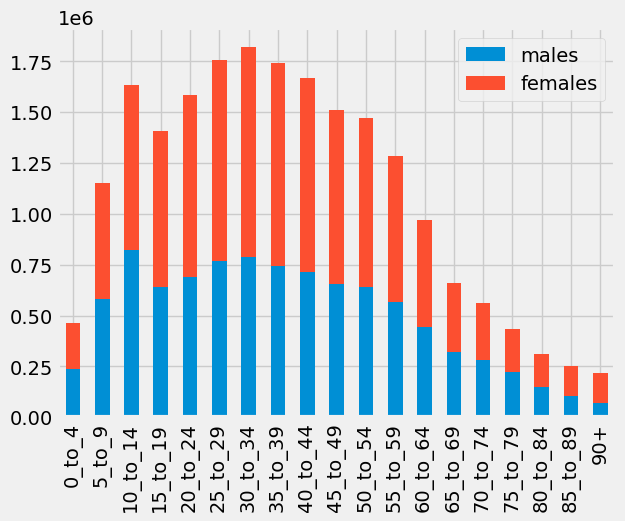

In [19]:
age_df.plot(kind='bar', stacked=True, y=['males','females'])
#age_df.plot(kind='bar', y='total')
#age_df.plot(subplots=True, figsize=(6, 6));
disable=True

# Total COVID -19 Cases of Gender Age Bands

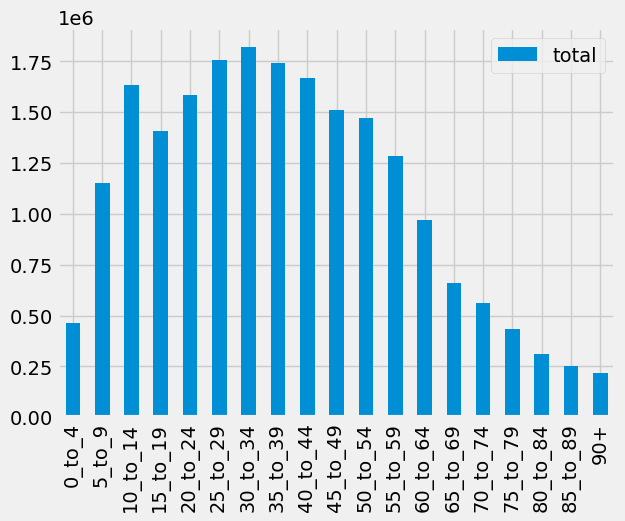

In [20]:
age_df.plot(kind='bar', y='total')
disable=True

# Gender and Age Band Interactive Bar Graph
##### An interactive bar graph of gender & age Band. Each bar represents a specific age band, and the distribution of cases within each band is differentiated by sex (male, female).

In [21]:
age_df.to_pickle("agedf.pkl")

In [22]:
age_df=pd.read_pickle("agedf.pkl")

agecols=wdg.SelectMultiple(
    options=['males', 'females', 'total'], # options available
    value=['males', 'females'], # initial value
    rows=3, # rows of the selection box
    description='Sex',
    disabled=False
)

def age_graph(graphcolumns):
    # our callback function.
    ncols=len(graphcolumns)
    if ncols>0:
        age_df.plot(kind='bar', stacked=True, y=list(graphcolumns)) # graphcolumns is a tuple - we need a list
        #plt.show() # important - graphs won't update properly if this is missing

     # Add titles and labels
        plt.title('Gender and Age Bands')
        plt.xlabel('Age Bands')
        plt.ylabel('Number of Cases')
        plt.xticks(rotation=70, ha='right')
        plt.legend()
        plt.show()
    else:
        # if the user has not selected any column, print a message instead
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")
    
# keep calling age_graph(graphcolumns=value_of_agecols); capture output in widget output    
output=wdg.interactive_output(age_graph, {'graphcolumns': agecols})

display(agecols, output)

SelectMultiple(description='Sex', index=(0, 1), options=('males', 'females', 'total'), rows=3, value=('males',…

Output()

# Data Updates
##### Click on the button bellow to refresh and update the data

In [23]:
# our API access function. This will be called by the button when it is clicked
def access_api(button):
    # Ignore the button parameter
    #
    # put code for polling the API here
    
    api = Cov19API(filters=filters, structure=structure)
    return api.get_json()
    
def api_button_callback(button):
    apidata=access_api(button)
    global df
    df=wrangle_data(apidata)
    refresh_graph(graphcolumns)
    # after all is done, you can switch the icon on the button to a "check" sign
    # and optionally disable the button - it won't be needed again.
    apibutton.icon="check"
    apibutton.disabled=True

# see the doc for the parameters    
apibutton=wdg.Button(
    description='Update data',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to refresh data',
    icon='refresh' # (FontAwesome names without the `fa-` prefix)
)

# register the callback function with the button
apibutton.on_click(api_button_callback)

# this is an iPython function that generalises print for Jupyter Notebooks; we use it to 
# display the widgets
display(apibutton)

Button(button_style='success', description='Update data', icon='refresh', style=ButtonStyle(), tooltip='Click …

# Download Data
##### Click on the button below to download current data from the Public Heath England API.

In [24]:
# our API access function. This will be called by the button when it is clicked
def access_api(button):
    # Ignore the button parameter
    #
    # put code for polling the API here
    api = Cov19API(filters=filters, structure=structure)
    #
    # after all is done, you can switch the icon on the button to a "check" sign
    # and optionally disable the button - it won't be needed again.
    apibutton.icon="check"
    apibutton.disabled=True

# see the doc for the parameters    
apibutton=wdg.Button(
    description='Download data',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to download current Public Health England data',
    icon='download' # (FontAwesome names without the `fa-` prefix)
)

# register the callback function with the button
apibutton.on_click(access_api)

# this is an iPython function that generalises print for Jupyter Notebooks; we use it to 
# display the widgets
display(apibutton)

Button(button_style='info', description='Download data', icon='download', style=ButtonStyle(), tooltip='Click …

# Conclusion

#### Summary of Key Findings:
##### In the exploration of COVID-19 data, several key findings have emerged that provide valuable insights into the dynamics of the pandemic. The daily deaths and cumulative deaths over time, along with the age distribution of cases by sex and age bands, offer crucial information for understanding the impact of the virus. Some of the noteworthy findings include:

##### Trends in Daily and Cumulative Deaths: Analyzing the trends in daily and cumulative deaths over time has revealed patterns that may be indicative of the effectiveness of public health interventions, the severity of outbreaks, and the resilience of healthcare systems.

##### Age Distribution Insights: The examination of age distribution by sex and age bands has shed light on the demographic groups most affected by the virus. Understanding these patterns is vital for targeted public health measures and resource allocation.

# Acknowledgments

##### Credits to Public Health England (PHE) for Providing Data


# Author and Copyright Notice: 

##### Based on UK Government [data](https://coronavirus.data.gov.uk/) published by [Public Health England](https://www.gov.uk/government/organisations/public-health-england) and on the DIY Covid Dashboard Kit, (C) 2023 Lorraine N A Bonney (l.n.b.bonney@se23.qmul.ac.uk - web). This notebook is released under the [GNU GPLv3.0 or later](https://www.gnu.org/licenses/).

# Reference:

##### Public Health England (PHE)

##### UK, G., 2020. Coronavirus (COVID-19) in the UK.

##### Available at:
##### https://coronavirus.data.gov.uk/


# Deploying the dashboard

##### Once your code is ready and you are satisfied with the appearance of the graphs, replace all the text boxes above with the explanations you would like a dashboard user to see. The next step is deploying the dashboard online - there are several options for this, we suggest deploying as a [Binder](https://mybinder.org/). This is basically the same technique that has been used to package this tutorial and to deploy this template dashboard. The instructions may seem a bit involved, but the actual steps are surprisingly easy - we will be going through them together during a live session. You will need an account on [GitHub](https://github.com/) for this - if you don't have one already, now it's the time to create it.